### FORECASTING NUMBER OF AIRLINES PASSENGERS USING MULTI  LAYERS PERCEPTRON (MLP)

In this Notebook we will forcast the number of passengers of an airlines compagny Using Multilayers Perceptrons from keras Librairies. We are using a Dataset given as a csv file. To extract the datas in the csv files we will use pandas librairies.

In [3]:
# import the librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense  ## contains the MLP Model
from keras import metrics  ## helps us to measure the score of our model
from sklearn.preprocessing import MinMaxScaler ## help us to scale the dataset
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Visualize the dataset
dataset= pd.read_csv("./DATASET/airlines.csv", sep=',')
dataset.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


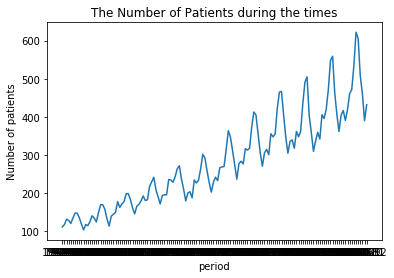

In [5]:

Dataset_array= np.array(dataset)
Input= Dataset_array[:,0]
Output= Dataset_array[:,1].reshape(-1,1)
plt.figure(1)
plt.plot(Input,Output)
plt.ylabel("Number of patients")
plt.xlabel("period")
plt.title("The Number of Patients during the times")
plt.show()

In [6]:
#preprocessing of our data
N,D= Output.shape
X1=Output[0:N-3]
X2=Output[1:N-2]
X3=Output[2:N-1]

X= np.concatenate((X1,X2,X3), axis=1)
Y = (Output[3:N])

In [7]:
scaler = MinMaxScaler()
scaler.fit(X)
X= scaler.transform(X)
 
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y= scaler1.transform(Y)

print(X.shape, Y.shape)

(141, 3) (141, 1)


In [8]:
#Build the model
model = Sequential()
 
model.add(Dense(32,activation='relu',input_dim=3))
 
model.add(Dense(32,activation='relu'))
 
model.add(Dense(1,activation='sigmoid'))
 
model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=[metrics.mae])
 
model.fit(X,Y,epochs= 1000 , batch_size=32,verbose =2)
 
predict = model.predict(X,verbose=1)
 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 0s - loss: 0.0729 - mean_absolute_error: 0.2293
Epoch 2/1000
 - 0s - loss: 0.0690 - mean_absolute_error: 0.2231
Epoch 3/1000
 - 0s - loss: 0.0655 - mean_absolute_error: 0.2171
Epoch 4/1000
 - 0s - loss: 0.0621 - mean_absolute_error: 0.2114
Epoch 5/1000
 - 0s - loss: 0.0588 - mean_absolute_error: 0.2053
Epoch 6/1000
 - 0s - loss: 0.0553 - mean_absolute_error: 0.1986
Epoch 7/1000
 - 0s - loss: 0.0518 - mean_absolute_error: 0.1924
Epoch 8/1000
 - 0s - loss: 0.0485 - mean_absolute_error: 0.1852
Epoch 9/1000
 - 0s - loss: 0.0450 - mean_absolute_error: 0.1780
Epoch 10/1000
 - 0s - loss: 0.0417 - mean_absolute_error: 0.1710
Epoch 11/1000
 - 0s - loss: 0.0384 - mean_absolute_error: 0.1631
Epoch 12/1000
 - 0s - loss: 0.0351 - mean_absolute_error: 0.1558
Epoch 13/1000
 - 0s - loss: 0.0319 - mean_absolute_error: 0.1479
Epoch 14/1000
 - 0s - loss: 0.0286 - mean_ab

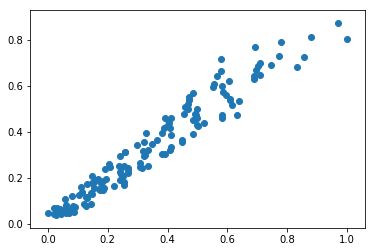

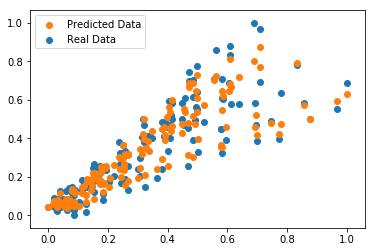

In [9]:
plt.figure(2)
plt.scatter(Y,predict)
plt.show(block=False)
 
plt.figure(3)
Test= plt.scatter(X[:,0],Y)
Predict = plt.scatter(X[:,0],predict)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()